In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# declare each array (longitude and latitude) as a variable.
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
print(coordinates[0], coordinates[1])

(44.72758066265092, 69.43210105997181) (18.507076816249068, -73.68856913209503)


In [5]:
print (coordinates)

[(44.72758066265092, 69.43210105997181), (18.507076816249068, -73.68856913209503), (69.9820710464434, 85.54102822477421), (36.15113447850915, 166.67809595052086), (-69.60618064740567, -87.46841102130627), (29.01741368159125, -159.95750265185876), (-10.526762440522148, -125.83134225329898), (-62.126458164115476, -158.91252983954277), (-6.080063006074127, 33.79217694575456), (77.67763528677975, -136.2989458922217), (-89.00648832163955, -165.14200306478978), (-73.35659782644922, 101.20957728608602), (34.742630659883716, -143.49561478530944), (-29.85398620254108, -31.05266816940255), (-7.552452295827692, -123.11061577606466), (-52.26369693725719, 47.10555443124727), (-50.54365726644631, 154.8113588839056), (-35.72985525558415, -114.53122321323602), (22.26861171402163, 114.18695058628327), (-51.28327011358083, 145.13203901711518), (-69.42729247271173, -102.57940262570689), (43.32801359996819, 102.84734155270712), (-35.38971888261628, 2.9947149297560713), (3.056184519270218, 87.0535937317292

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [8]:
cities

['zhanatas',
 'les cayes',
 'dudinka',
 'severo-kurilsk',
 'punta arenas',
 'kapaa',
 'atuona',
 'mataura',
 'mgandu',
 'tuktoyaktuk',
 'albany',
 'hilo',
 'sao joao da barra',
 'tsihombe',
 'hobart',
 'rikitea',
 'shenzhen',
 'hovd',
 'luderitz',
 'hambantota',
 'nikolskoye',
 'snasa',
 'lubango',
 'batagay-alyta',
 'faanui',
 'victoria',
 'ushuaia',
 'cidreira',
 'moose factory',
 'la asuncion',
 'yanai',
 'belyy yar',
 'norman wells',
 'pevek',
 'busselton',
 'russell',
 'castro',
 'tabou',
 'san patricio',
 'talnakh',
 'kodiak',
 'avera',
 'kruisfontein',
 'pisco',
 'tasiilaq',
 'portland',
 'port alfred',
 'new norfolk',
 'villa bruzual',
 'avarua',
 'hermanus',
 'leningradskiy',
 'butaritari',
 'prattville',
 'jamestown',
 'klaksvik',
 'ullapool',
 'ler',
 'tabialan',
 'jiwani',
 'cape town',
 'nioro',
 'cuamba',
 'illoqqortoormiut',
 'senneterre',
 'vaini',
 'ambon',
 'farah',
 'puerto madryn',
 'tiksi',
 'viedma',
 'katsuura',
 'egvekinot',
 'taolanaro',
 'kavieng',
 'yellowkni

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# 6.2.6
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list and each city url.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# try-except block
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zhanatas
City not found. Skipping...
Processing Record 2 of Set 1 | les cayes
Processing Record 3 of Set 1 | dudinka
Processing Record 4 of Set 1 | severo-kurilsk
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | mgandu
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | sao joao da barra
Processing Record 14 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | shenzhen
Processing Record 18 of Set 1 | hovd
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | hambantota
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set

Processing Record 43 of Set 4 | keti bandar
Processing Record 44 of Set 4 | hohhot
Processing Record 45 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 46 of Set 4 | victoria point
Processing Record 47 of Set 4 | nanortalik
Processing Record 48 of Set 4 | paragominas
Processing Record 49 of Set 4 | seoul
Processing Record 50 of Set 4 | oktyabrskoye
Processing Record 1 of Set 5 | sundsvall
Processing Record 2 of Set 5 | san buenaventura
Processing Record 3 of Set 5 | bengkulu
Processing Record 4 of Set 5 | quatre cocos
Processing Record 5 of Set 5 | awjilah
Processing Record 6 of Set 5 | gazalkent
Processing Record 7 of Set 5 | poum
Processing Record 8 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 9 of Set 5 | haimen
Processing Record 10 of Set 5 | toungoo
City not found. Skipping...
Processing Record 11 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 12 of Set 5 | vardo
Processing Record 13 of Set 5 | ust-ishim
Processing Record 1

Processing Record 27 of Set 8 | anadyr
Processing Record 28 of Set 8 | linqing
Processing Record 29 of Set 8 | newport
Processing Record 30 of Set 8 | hun
Processing Record 31 of Set 8 | atar
Processing Record 32 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 33 of Set 8 | wanaka
Processing Record 34 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 35 of Set 8 | esmeralda
Processing Record 36 of Set 8 | shirdi
Processing Record 37 of Set 8 | homa bay
Processing Record 38 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 39 of Set 8 | ahipara
Processing Record 40 of Set 8 | sembe
Processing Record 41 of Set 8 | jalu
Processing Record 42 of Set 8 | barcelona
Processing Record 43 of Set 8 | cuddapah
Processing Record 44 of Set 8 | saint-augustin
Processing Record 45 of Set 8 | ixtapa
Processing Record 46 of Set 8 | sandi
Processing Record 47 of Set 8 | sinnamary
Processing Record 48 of Set 8 | sitka
Processing Record 49 of 

Processing Record 12 of Set 12 | ubate
Processing Record 13 of Set 12 | san jose de gracia
Processing Record 14 of Set 12 | manacapuru
Processing Record 15 of Set 12 | rio cuarto
Processing Record 16 of Set 12 | villa sandino
Processing Record 17 of Set 12 | kudahuvadhoo
Processing Record 18 of Set 12 | champerico
Processing Record 19 of Set 12 | chaiyaphum
Processing Record 20 of Set 12 | angra
City not found. Skipping...
Processing Record 21 of Set 12 | kendari
Processing Record 22 of Set 12 | rio grande
Processing Record 23 of Set 12 | qandala
Processing Record 24 of Set 12 | krasnovishersk
Processing Record 25 of Set 12 | nyurba
Processing Record 26 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 27 of Set 12 | north bend
Processing Record 28 of Set 12 | kinshasa
Processing Record 29 of Set 12 | krosno
Processing Record 30 of Set 12 | chapais
Processing Record 31 of Set 12 | marystown
Processing Record 32 of Set 12 | deputatskiy
Processing Record 33 of Set 12 | g

In [13]:
len(city_data)

558

In [14]:
# convert a list of dictionaries to a Pandas DataFrame using 
# df = pd.DataFrame(list with dictionaries)

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Les Cayes,18.2000,-73.7500,81.93,63,2,12.03,HT,2022-02-02 20:18:25
1,Dudinka,69.4058,86.1778,-8.01,100,95,5.50,RU,2022-02-02 20:18:26
2,Severo-Kurilsk,50.6789,156.1250,26.29,83,95,6.87,RU,2022-02-02 20:18:26
3,Punta Arenas,-53.1500,-70.9167,51.82,87,75,10.36,CL,2022-02-02 20:15:35
4,Kapaa,22.0752,-159.3190,78.78,70,20,1.01,US,2022-02-02 20:18:27
5,Atuona,-9.8000,-139.0333,77.49,79,93,15.70,PF,2022-02-02 20:15:57
6,Mataura,-46.1927,168.8643,57.47,98,100,4.47,NZ,2022-02-02 20:18:28
7,Mgandu,-5.9500,34.1333,61.54,95,100,1.36,TZ,2022-02-02 20:18:28
8,Tuktoyaktuk,69.4541,-133.0374,-27.40,75,40,10.36,CA,2022-02-02 20:18:29
9,Albany,42.6001,-73.9662,45.73,72,89,1.99,US,2022-02-02 20:15:17


In [16]:
# Recall that to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear:
# new_column_order = ["column2", "column4", "column1"]
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Then, we assign a new or the same DataFrame with new column order:
# df = df[new_column_order]
city_data_new_df = city_data_df[new_column_order]
city_data_new_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Les Cayes,HT,2022-02-02 20:18:25,18.2000,-73.7500,81.93,63,2,12.03
1,Dudinka,RU,2022-02-02 20:18:26,69.4058,86.1778,-8.01,100,95,5.50
2,Severo-Kurilsk,RU,2022-02-02 20:18:26,50.6789,156.1250,26.29,83,95,6.87
3,Punta Arenas,CL,2022-02-02 20:15:35,-53.1500,-70.9167,51.82,87,75,10.36
4,Kapaa,US,2022-02-02 20:18:27,22.0752,-159.3190,78.78,70,20,1.01
5,Atuona,PF,2022-02-02 20:15:57,-9.8000,-139.0333,77.49,79,93,15.70
6,Mataura,NZ,2022-02-02 20:18:28,-46.1927,168.8643,57.47,98,100,4.47
7,Mgandu,TZ,2022-02-02 20:18:28,-5.9500,34.1333,61.54,95,100,1.36
8,Tuktoyaktuk,CA,2022-02-02 20:18:29,69.4541,-133.0374,-27.40,75,40,10.36
9,Albany,US,2022-02-02 20:15:17,42.6001,-73.9662,45.73,72,89,1.99


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Add Matplotlib inline magic command
%matplotlib inline

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]



In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1643836638.588103

In [21]:
today = time.strftime("%x")
today

'02/02/22'

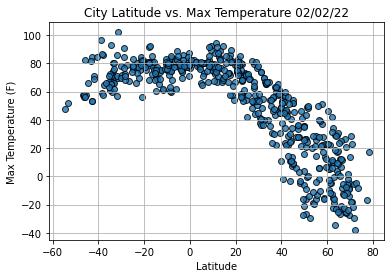

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Latitude_vs_MaxTemp.png")

# Show plot.
plt.show()

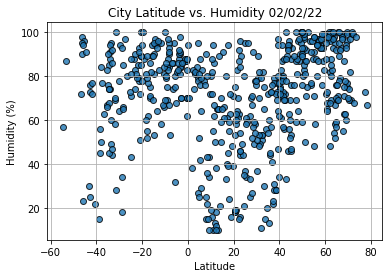

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Latitude_vs_Humidity.png")

# Show plot.
plt.show()

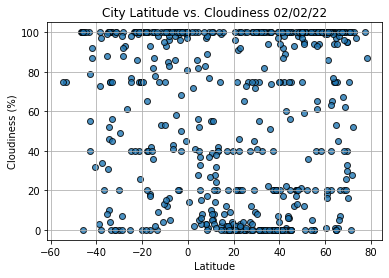

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Latitude_vs_Cloudiness.png")

# Show plot.
plt.show()

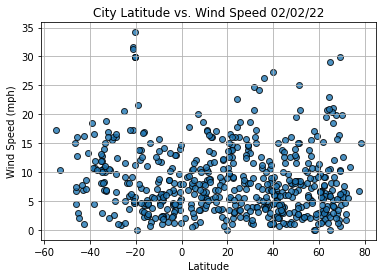

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Latitude_vs_WindSpeed.png")

# Show plot.
plt.show()